# Load Dataset

In [1]:
# Import all the needed packages 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle

# Package for transformation
from sklearn.preprocessing import LabelEncoder 

# Package for data division
from sklearn.model_selection import train_test_split

# Packages for LR, SVR and RFR
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Model evaluation metric or criteria
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # Using R2, RMSE, MAE and as criteria


In [2]:
# Read the csv file dataset 
CDS=pd.read_csv("CarPrice_Assignment.csv")
# Display the shape of the entire dataset
CDS.shape

(205, 26)

In [3]:
# Display the first 5 rows of the dataset
CDS.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Understant Dataset and Check Missing Value

In [4]:
# Check the basic information of the dataset
CDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
#Check if the data has any null values (Missing value)
CDS.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
# Check for the data structure
CDS.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data Preperation

In [7]:
# Split 'CarName'into 'CompName'
CompName = CDS['CarName'].apply(lambda x : x.split(' ')[0])
CDS.insert(3,"CompName",CompName)
CDS.drop(['CarName'],axis=1,inplace=True)

# Display the updated data
CDS.head()

,car_ID,symboling,CompName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
# Display each 'CompName'
CDS['CompName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
# Lowwer all the upper word in the 'CompName'
CDS.CompName = CDS.CompName.str.lower()

# Replace the name that spelling wrong with the correct word
def replace_name(a,b):
    CDS.CompName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

# Display the updated data
CDS.CompName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

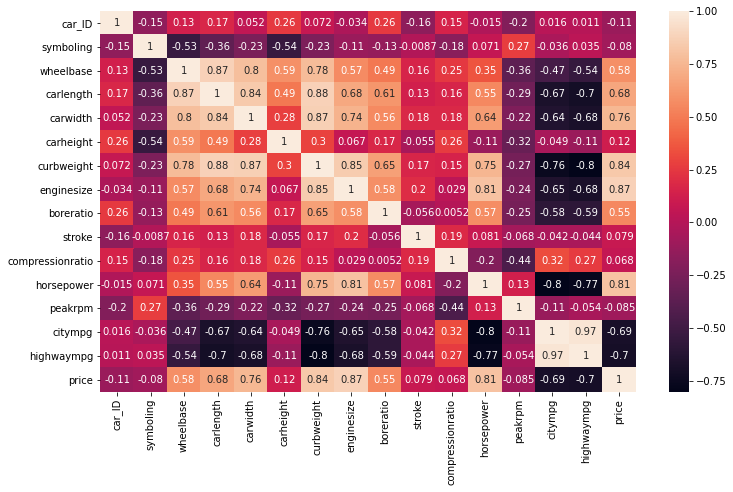

In [10]:
# Correlation between variables
plt.figure(figsize=(12,7))
Covar = CDS.corr()
# Use heatmap
sns.heatmap(Covar, annot = True);
# Save the plot as picture
plt.savefig("Heatmap.jpg")

In [11]:
# Analyzing only the correlation between the target variable (price) with the other columns
Corr = CDS.corr()['price'].drop('price')
Corr.sort_values()

highwaympg         -0.697599
citympg            -0.685751
car_ID             -0.109093
peakrpm            -0.085267
symboling          -0.079978
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
boreratio           0.553173
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
Name: price, dtype: float64

In [12]:
# Combine the variables
CDSCL = CDS[['fueltype', 'aspiration', 'doornumber', 
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']]
# Display the head
CDSCL.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
# Tranformation the variables into numerical
L=LabelEncoder()
CDS_col=("fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","cylindernumber")
for i in CDS_col:
    CDSCL[i]=L.fit_transform(CDSCL[i])
# Display the updated data
CDSCL.head()

<ipython-input-13-1080c2bd6625>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CDSCL[i]=L.fit_transform(CDSCL[i])


,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,0,1,0,2,0,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,1,2,2,0,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,0,0,3,1,0,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,0,0,3,0,0,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
# Feature selection, 20 features for X
X = CDSCL[['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 
           'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 
           'horsepower', 'peakrpm', 'citympg', 'highwaympg']] 
# Target column Y
y= CDSCL['price'] 

# Evaluation

In [15]:
# Data division, training and testing data split 80/20
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=55)

# Display the results of the division
print("Train data: {0:0.2f}%".format((len(X_train)/len(CDS.index)) * 100))
print("Test data: {0:0.2f}%".format((len(X_test)/len(CDS.index)) * 100))

Train data: 80.00%
Test data: 20.00%


In [16]:
# Display the shape of each train and test data
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (164, 20)
X_test shape:  (41, 20)
Y_train shape:  (164,)
Y_test shape:  (41,)


In [17]:
# Linear Regression
LR = LinearRegression()
LR.fit(X_train,y_train)
Predic_LR = LR.predict(X_test)

print("Model\t\t\t\t R2 \t\t RMSE \t\t MAE")
print("""Linear Regresson (LR) \t\t {:.2f} \t\t {:.4} \t {:.2f}""".format(r2_score(y_test,Predic_LR), 
                                                                     np.sqrt(mean_squared_error(y_test, Predic_LR)), 
                                                                     mean_absolute_error(LR.predict(X_test), y_test)))

Model				 R2 		 RMSE 		 MAE
Linear Regresson (LR) 		 0.89 		 2.473e+03 	 1786.70


In [18]:
# Support Vector Regression
svr = SVR(kernel='linear', C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)
Predic_svr = svr.predict(X_test)

print("Model\t\t\t\t R2 \t\t RMSE \t\t MAE")
print("""Support Vector Regression (SVR) \t {:.2f} \t\t {:.4} \t {:.2f}""".format(r2_score(y_test,Predic_svr), 
                                                                     np.sqrt(mean_squared_error(y_test, Predic_svr)), 
                                                                     mean_absolute_error(svr.predict(X_test), y_test)))

Model				 R2 		 RMSE 		 MAE
Support Vector Regression (SVR) 	 0.82 		 3.157e+03 	 2002.51


In [19]:
# Random Forest Regression
RFR = RandomForestRegressor(n_estimators=10, random_state=42)
RFR.fit(X_train, y_train.ravel()) 
Predic_RFR = RFR.predict(X_test)

print("Model\t\t\t\t R2 \t\t RMSE \t\t MAE")
print("""Random Forest Regression (RFR) \t {:.2f} \t\t {:.4} \t {:.2f}""".format(r2_score(y_test,Predic_RFR), 
                                                                     np.sqrt(mean_squared_error(y_test, Predic_RFR)), 
                                                                     mean_absolute_error(RFR.predict(X_test), y_test)))

Model				 R2 		 RMSE 		 MAE
Random Forest Regression (RFR) 	 0.92 		 2.122e+03 	 1336.56


In [20]:
# Save RFR model with pickle
# Save the model to disk
filename = 'RFR_model.sav'
pickle.dump(RFR, open(filename,'wb'))
# Load the model from disk
LM = pickle.load(open(filename, 'rb'))
# Making predictions
# X_test 100 first values
y_pred = LM.predict(X_test[:100])

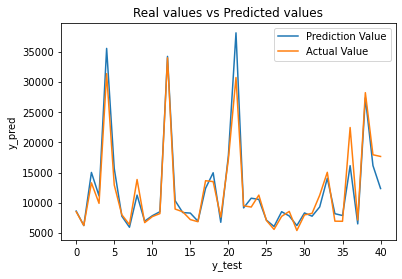

In [21]:
# Plotting y_test and y_pred to understand the spread
plt.plot(y_pred) 
# y_test 100 first values
plt.plot(y_test.values[:100]) 

# Display name for title, xlabel, ylabel
plt.title('Real values vs Predicted values')
plt.xlabel('y_test ')                       
plt.ylabel('y_pred') 
plt.legend(['Prediction Value', 'Actual Value'])

# Display and save the plot as picture
plt.savefig("Predictvalue.jpg")
plt.show()